In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Anime_dataset = pd.read_csv("/content/Top_Anime_data.csv")

In [ ]:
Anime_dataset.shape

(1000, 22)

In [ ]:
Anime_dataset.describe()

,Score,Popularity,Rank,Members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.156580,1805.637000,500.500000,223.648000
std,0.284344,1888.308553,288.819436,246.288299
min,7.800000,1.000000,1.000000,1.000000
25%,7.920000,413.750000,250.750000,31.750000
50%,8.100000,1139.500000,500.500000,132.000000
75%,8.312500,2633.750000,750.250000,330.000000
max,9.380000,12043.000000,1000.000000,998.000000


In [ ]:
Anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

In [ ]:
Anime_dataset.isnull().sum().sort_values(ascending = False)

Demographic    479
Broadcast      431
Premiered      431
Synonyms       291
Genres         229
English        141
Japanese         1
Score            0
Duration         0
Source           0
Studios          0
Licensors        0
Producers        0
Aired            0
Popularity       0
Status           0
Episodes         0
Type             0
Description      0
Members          0
Rank             0
Rating           0
dtype: int64

In [ ]:
Anime_dataset.drop("Synonyms", axis = 1 , inplace = True)

In [ ]:
mode_value = Anime_dataset['Premiered'].mode()[0]
Anime_dataset['Premiered'].fillna(mode_value, inplace=True)


In [ ]:
mode_value = Anime_dataset['Genres'].mode()[0]
Anime_dataset['Genres'].fillna(mode_value, inplace=True)


In [ ]:
Anime_dataset.drop("Broadcast", axis = 1 , inplace = True)

In [ ]:
Anime_dataset.dropna(subset=['Demographic','English'], inplace=True)

In [ ]:
Anime_dataset.isnull().sum().sort_values(ascending = False)

Score          0
Popularity     0
Duration       0
Demographic    0
Genres         0
Source         0
Studios        0
Licensors      0
Producers      0
Premiered      0
Aired          0
Status         0
Episodes       0
Type           0
English        0
Japanese       0
Description    0
Members        0
Rank           0
Rating         0
dtype: int64

In [ ]:
Anime_dataset.shape

(435, 20)

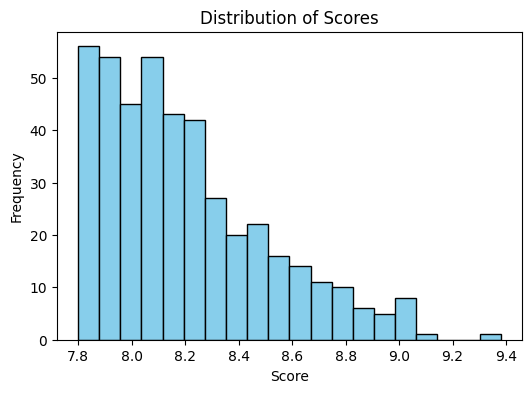

In [ ]:
#Visualize the distribution of scores using a histogram.
plt.figure(figsize=(6, 4))
plt.hist(Anime_dataset['Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

This histogram frequency vs Score shows how scores are distributed in the dataset and more than 50 animaes has 7.8 to 8.0 scores, as the scores increasing the frequency of animaes are decreasing. This says that only few animaes have >8.4 scores

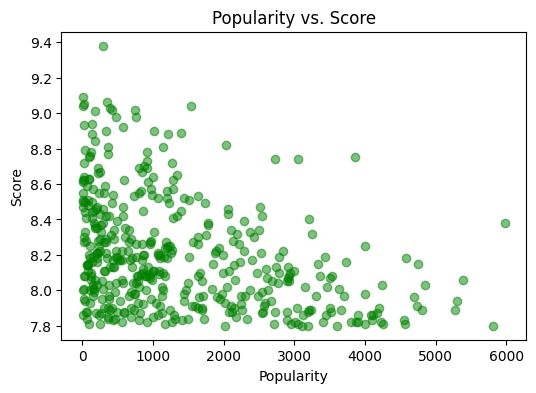

In [ ]:
#scatter plot to visualize the relationship between popularity and score.
plt.figure(figsize=(6, 4))
plt.scatter(Anime_dataset['Popularity'], Anime_dataset['Score'], alpha=0.5, color='green')
plt.xlabel('Popularity')
plt.ylabel('Score')
plt.title('Popularity vs. Score')
plt.show()

<ipython-input-62-16b42a3ab65f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=Anime_dataset, palette='pastel')


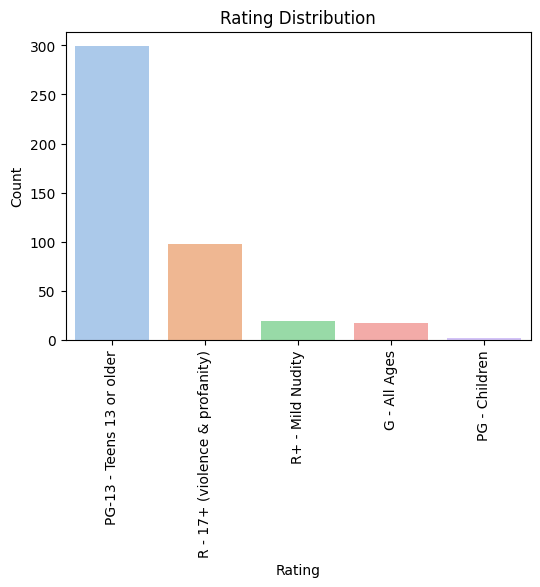

In [ ]:
#Rating Distribution:Visualize the distribution of ratings using a countplot.
plt.figure(figsize=(6, 4))
sns.countplot(x='Rating', data=Anime_dataset, palette='pastel')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.show()

The count plot, count vs rating shows that PG-13-teens related movies has highest rating and PG- Children has lowest rating

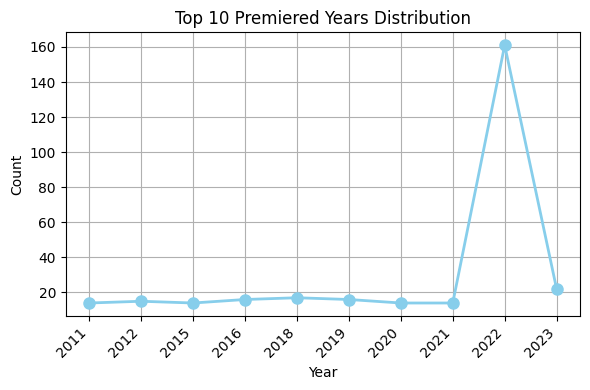

In [ ]:
#Visualizing the distribution of premiered years for the top 10 most frequent years using a line graph

# Extract premiered years from the dataset
premiered_years = Anime_dataset['Premiered'].str.extract(r'(\d{4})')[0]

# Get the top 10 most frequent premiered years
top_10_years = premiered_years.value_counts().head(10)

# Sort the top 10 years by year
top_10_years = top_10_years.sort_index()

# Plot the distribution of premiered years for the top 10 most frequent years using a line graph
plt.figure(figsize=(6, 4))
plt.plot(top_10_years.index, top_10_years.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 10 Premiered Years Distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

This line graph, count vs year shows that 2022 year has highest number of anime release as compared to other years

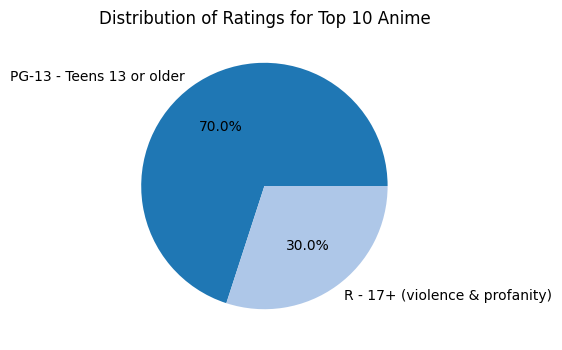

In [ ]:
##Visualizing the distribution of ratings in a pie chart

# Select the top 10 anime based on the number of members
top_10_anime = Anime_dataset.sort_values(by='Members', ascending=False).head(10)

# Calculate the distribution of ratings for the top 10 anime
rating_distribution = top_10_anime['Rating'].value_counts()

# Plot the distribution of ratings in a pie chart
plt.figure(figsize=(6, 4))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Distribution of Ratings for Top 10 Anime')
plt.show()


This pie chart represents the rating of top 10 animes, so 70 % of the animes are PG -Teens 13 rated and 30 % of the animes are R-17+ rated.

<ipython-input-73-9e4f82116722>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


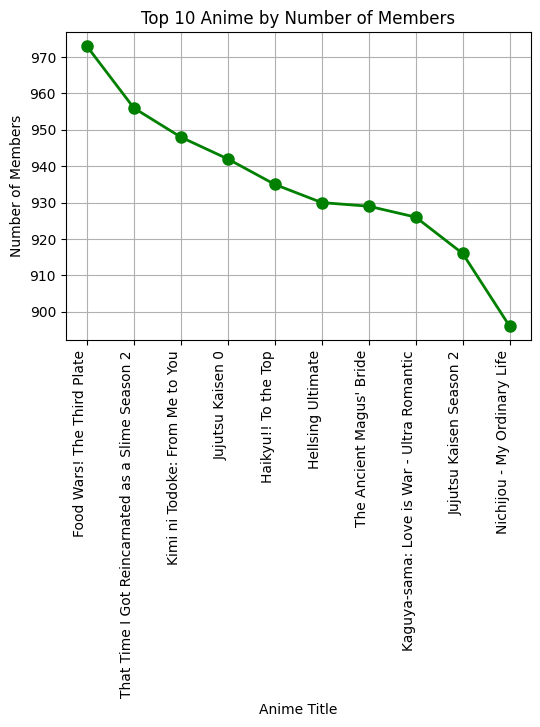

In [ ]:

# Sort the dataset by the number of members in descending order
top_10_anime = Anime_dataset.sort_values(by='Members', ascending=False).head(10)

# Plot the line graph
plt.figure(figsize=(6, 4))
plt.plot(top_10_anime['English'], top_10_anime['Members'], marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Anime Title')
plt.ylabel('Number of Members')
plt.title('Top 10 Anime by Number of Members')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


The line graph, top 10 animes vs members shows that how number of viewers or members decreasing with respect to the animes.

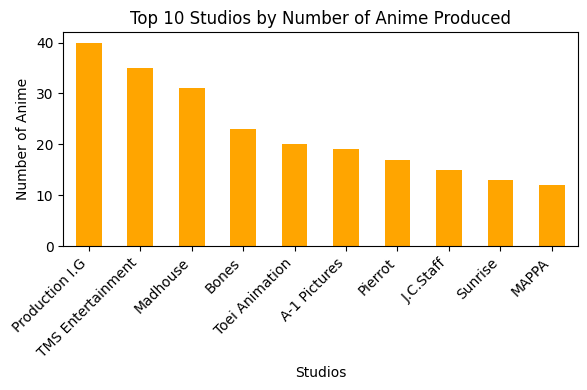

In [ ]:
#Visualizing number of animes produces by top 10 studios

# Get the count of anime produced by each studio
studio_counts = Anime_dataset['Studios'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(6, 4))
studio_counts.plot(kind='bar', color='orange')
plt.xlabel('Studios')
plt.ylabel('Number of Anime')
plt.title('Top 10 Studios by Number of Anime Produced')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This visualization reperesents number of animes produced by the top 10 studios, Production I.G has highest number of anime produced.

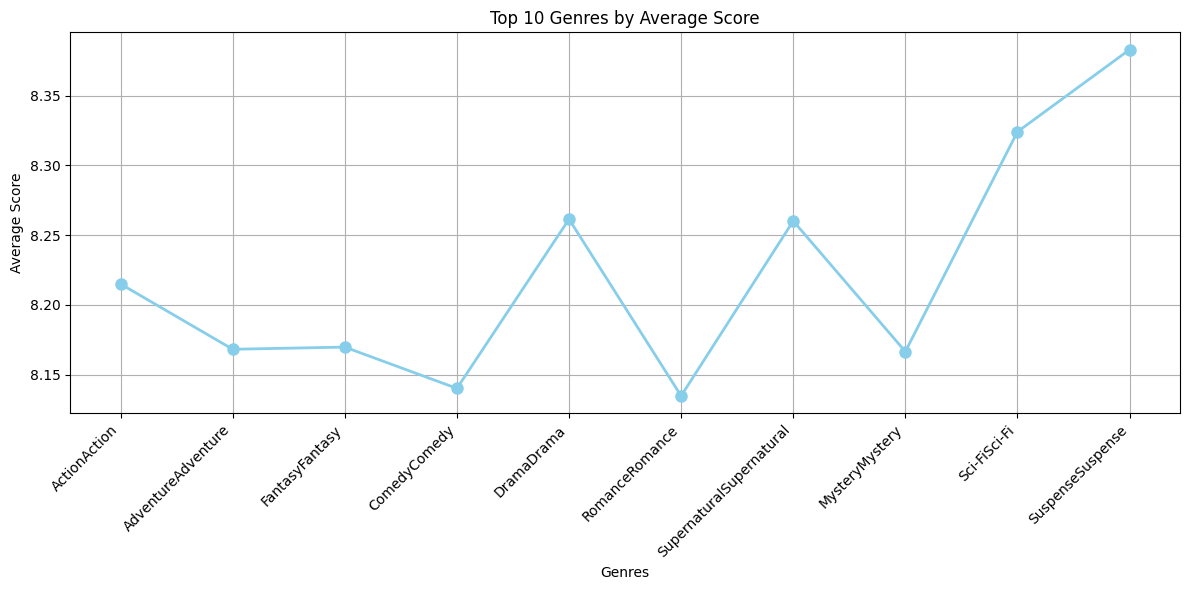

In [ ]:
##Visualizing the scores of top 10 geners using line graph

# Get the top 10 genres based on frequency
top_10_genres = Anime_dataset['Genres'].str.split(', ', expand=True).stack().value_counts().head(10).index

# Calculate the average score for each genre
genre_scores = {}
for genre in top_10_genres:
    genre_scores[genre] = Anime_dataset[Anime_dataset['Genres'].str.contains(genre)]['Score'].mean()

# Convert genre_scores dictionary to lists for plotting
genres = list(genre_scores.keys())
scores = list(genre_scores.values())

# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(genres, scores, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Genres')
plt.ylabel('Average Score')
plt.title('Top 10 Genres by Average Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

The visualization show that Romance genre has the lowest scores and suspense genre has the highest scores.